# San Francisco Airbnb 

#### By: Leslie Romo

<center> <img src= "air.webp" style="width:600px;height:700px/"><center>

### Introduction

Airbnb is an American company founded in 2008 based in San Francisco, California with vacation rentals in more than 220 countries and regions. Airbnb is an easy and convenient way to enjoy your vacation in a stay that feels more like home than a hotel room. There are a few things that could either make or break a vacation. One of the important parts of traveling is finding a good place to stay, a home away from home. 

With the increasing number of options, it can be fairly complicated to find the perfect Airbnb that provides you with everything you need at a good price. There are over 5.6 million Airbnb listings all over the world, eight thousand of which are located in San Francisco. With so many options varying in price and features, as a hostee, it is important to know how you can find the Airbnb that fits your needs and your price range. In order to select the best option, you will need to know some information regarding factors that impact pricing. As a future or current Airbnb host, you may want to know about factors that can potentially yield a higher revenue on your property. In this project, I will analyze San Francisco Airbnb data to find useful insights that would facilitate both finding an Airbnb to stay at and finding a good property or property features to invest in.

### Research Questions:

What aspects of an Airbnb yeild higher revenue? What features of an Airbnb alter the rental price the most?

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats
from sklearn.preprocessing import OneHotEncoder


#linear regression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

#ridge regression
from sklearn.linear_model import Ridge

#xgboost 
import xgboost as xgb

### Data Used 

The dataset used in this project where obtained from Tom Slee's website. The dataset holds data from 8345 unique airbnbs listed in San Francisco in the year 2017. The data can be viewed [here](http://tomslee.net/airbnb-data-collection-get-the-data). 

### Importing Data

In [2]:
data = pd.read_csv("sf_airbnb_2017.csv")
data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,4897143,1430,22931450,Shared room,NaN,San Francisco,NaN,North Beach,93,4.5,4,1.0,NaN,147.0,NaN,2017-07-10 23:43:52.770793,37.799263,-122.404322,0101000020E610000069C36169E0995EC091F3FE3F4EE6...
1,4670847,1430,22931450,Shared room,NaN,San Francisco,NaN,North Beach,115,4.5,4,1.0,NaN,137.0,NaN,2017-07-10 23:43:51.999819,37.798920,-122.404085,0101000020E610000077F35487DC995EC0670FB40243E6...
2,6750199,1430,25714209,Shared room,NaN,San Francisco,NaN,Downtown/Civic Center,4,5.0,2,1.0,NaN,145.0,NaN,2017-07-10 23:43:43.764972,37.785847,-122.416518,0101000020E6100000800C1D3BA89A5EC071546EA296E4...
3,11461771,1430,9744251,Shared room,NaN,San Francisco,NaN,Downtown/Civic Center,8,4.0,14,1.0,NaN,138.0,NaN,2017-07-10 23:43:42.484023,37.782079,-122.421775,0101000020E61000004ED1915CFE9A5EC0B7F1272A1BE4...
4,259622,1430,329072,Shared room,NaN,San Francisco,NaN,Financial District,125,4.5,4,1.0,NaN,90.0,NaN,2017-07-10 23:43:39.841547,37.794410,-122.404725,0101000020E6100000E9B7AF03E7995EC0C4CE143AAFE5...


### Description of Data

In [3]:
data.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,8.344000e+03,8344.0,8.344000e+03,0.0,0.0,8344.000000,8344.000000,8344.000000,8344.000000,0.0,8344.000000,0.0,8344.000000,8344.000000
mean,9.894985e+06,1430.0,2.616860e+07,NaN,NaN,26.241611,2.936361,3.220997,1.353068,NaN,238.697267,NaN,37.767426,-122.430419
std,5.967917e+06,0.0,3.268320e+07,NaN,NaN,49.099669,2.351631,2.047397,0.928452,NaN,407.119543,NaN,0.021844,0.025573
min,9.580000e+02,1430.0,4.600000e+01,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,10.000000,NaN,37.708278,-122.511500
25%,4.679640e+06,1430.0,3.476019e+06,NaN,NaN,1.000000,0.000000,2.000000,1.000000,NaN,100.000000,NaN,37.753111,-122.442183
50%,1.012637e+07,1430.0,1.163842e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,158.000000,NaN,37.769402,-122.425499
75%,1.510173e+07,1430.0,3.773464e+07,NaN,NaN,27.000000,5.000000,4.000000,2.000000,NaN,250.000000,NaN,37.785325,-122.412531
max,1.978199e+07,1430.0,1.395538e+08,NaN,NaN,513.000000,5.000000,16.000000,10.000000,NaN,10000.000000,NaN,37.826194,-122.364759


### Rename some columns

In [4]:
data.columns = ["id", "survey", "host", "room_type", "country", "city", "borough", "neighborhood", "reviews", "satisfaction", "accommodates", "bedrooms", "bathrooms", "price", "minstay", "last_modified", "latitude", "longitude", "location"]
data.head(3)

,id,survey,host,room_type,country,city,borough,neighborhood,reviews,satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,4897143,1430,22931450,Shared room,NaN,San Francisco,NaN,North Beach,93,4.5,4,1.0,NaN,147.0,NaN,2017-07-10 23:43:52.770793,37.799263,-122.404322,0101000020E610000069C36169E0995EC091F3FE3F4EE6...
1,4670847,1430,22931450,Shared room,NaN,San Francisco,NaN,North Beach,115,4.5,4,1.0,NaN,137.0,NaN,2017-07-10 23:43:51.999819,37.798920,-122.404085,0101000020E610000077F35487DC995EC0670FB40243E6...
2,6750199,1430,25714209,Shared room,NaN,San Francisco,NaN,Downtown/Civic Center,4,5.0,2,1.0,NaN,145.0,NaN,2017-07-10 23:43:43.764972,37.785847,-122.416518,0101000020E6100000800C1D3BA89A5EC071546EA296E4...


### Remove Unwanted Columns

In [5]:
drop_col = ["country", "borough", "bathrooms", "minstay", "last_modified"]
data = data.drop(drop_col, axis = 1)
data.head(5)

,id,survey,host,room_type,city,neighborhood,reviews,satisfaction,accommodates,bedrooms,price,latitude,longitude,location
0,4897143,1430,22931450,Shared room,San Francisco,North Beach,93,4.5,4,1.0,147.0,37.799263,-122.404322,0101000020E610000069C36169E0995EC091F3FE3F4EE6...
1,4670847,1430,22931450,Shared room,San Francisco,North Beach,115,4.5,4,1.0,137.0,37.798920,-122.404085,0101000020E610000077F35487DC995EC0670FB40243E6...
2,6750199,1430,25714209,Shared room,San Francisco,Downtown/Civic Center,4,5.0,2,1.0,145.0,37.785847,-122.416518,0101000020E6100000800C1D3BA89A5EC071546EA296E4...
3,11461771,1430,9744251,Shared room,San Francisco,Downtown/Civic Center,8,4.0,14,1.0,138.0,37.782079,-122.421775,0101000020E61000004ED1915CFE9A5EC0B7F1272A1BE4...
4,259622,1430,329072,Shared room,San Francisco,Financial District,125,4.5,4,1.0,90.0,37.794410,-122.404725,0101000020E6100000E9B7AF03E7995EC0C4CE143AAFE5...


### Check for Missing Values

In [6]:
data.isnull().values.any()

False

### Remove Listings with value 0

In [7]:
data = data[data.bedrooms > 0]
data = data[data.accommodates > 0]
data = data[data.price > 0]
data = data[data.bedrooms > 0]
data = data[data.reviews > 0]
data = data[data.satisfaction > 0]
data = data.loc[data['price'] != 10000.0]

data.head(5)
#4636 rows & 12 columns

,id,survey,host,room_type,city,neighborhood,reviews,satisfaction,accommodates,bedrooms,price,latitude,longitude,location
0,4897143,1430,22931450,Shared room,San Francisco,North Beach,93,4.5,4,1.0,147.0,37.799263,-122.404322,0101000020E610000069C36169E0995EC091F3FE3F4EE6...
1,4670847,1430,22931450,Shared room,San Francisco,North Beach,115,4.5,4,1.0,137.0,37.798920,-122.404085,0101000020E610000077F35487DC995EC0670FB40243E6...
2,6750199,1430,25714209,Shared room,San Francisco,Downtown/Civic Center,4,5.0,2,1.0,145.0,37.785847,-122.416518,0101000020E6100000800C1D3BA89A5EC071546EA296E4...
3,11461771,1430,9744251,Shared room,San Francisco,Downtown/Civic Center,8,4.0,14,1.0,138.0,37.782079,-122.421775,0101000020E61000004ED1915CFE9A5EC0B7F1272A1BE4...
4,259622,1430,329072,Shared room,San Francisco,Financial District,125,4.5,4,1.0,90.0,37.794410,-122.404725,0101000020E6100000E9B7AF03E7995EC0C4CE143AAFE5...


### San Francisco Airbnb Density Map

In [33]:
import folium
from folium.plugins import HeatMap

map = folium.Map(location =[37.77, -122.42], zoom_start = 12)
HeatMap(data[["latitude", "longitude"]], radius = 8, gradient = {0.2: "black", 0.4: "purple", 0.6: "cyan", 0.8: "yellow", 1:"white"}).add_to(map)
display(map)

This visualization represents the density of Airbnb listings in San Francisco. The visualization shows the majority of the lsitings in towards the north east of SF. Overall, Airbnb listing are available throughout most of San Francisco.

### Total Number Airbnb Listings in each Neighborhood

<AxesSubplot:title={'center':'Number of Listings in each Neighborhood'}, ylabel='neighborhood'>

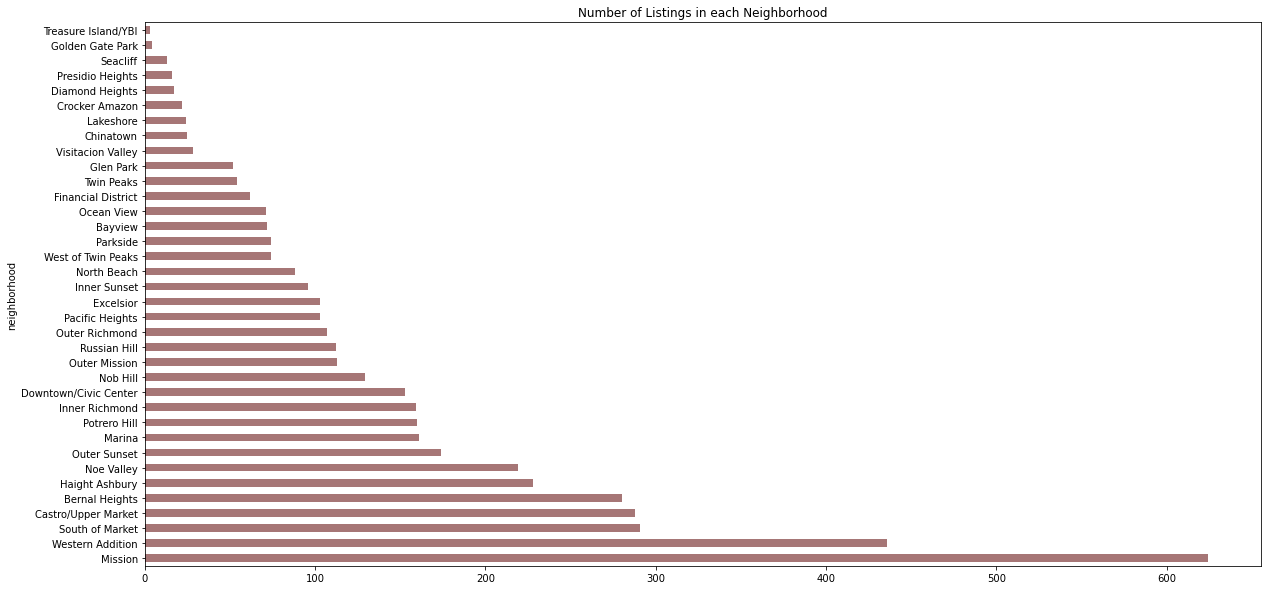

In [9]:
totalNeighborhood = data.value_counts(("neighborhood"))
totalNeighborhood.plot(kind = "barh", x = "Number of Listings", title = "Number of Listings in each Neighborhood", color = "#a67676", figsize = (20,10))

Here we see the number of Airbnb listings each neighborhood hold. There are neighborhood such as Presidio Heights that holds very little Airbnb listings while the mission neighborhood holds a big portion.

### San Francisco Airbnb Neighborhood Price Range

<AxesSubplot:title={'center':'Top Ten Neighborhoods with the Heighest Average Price'}, xlabel='Neighborhood', ylabel='Price in Dollars'>

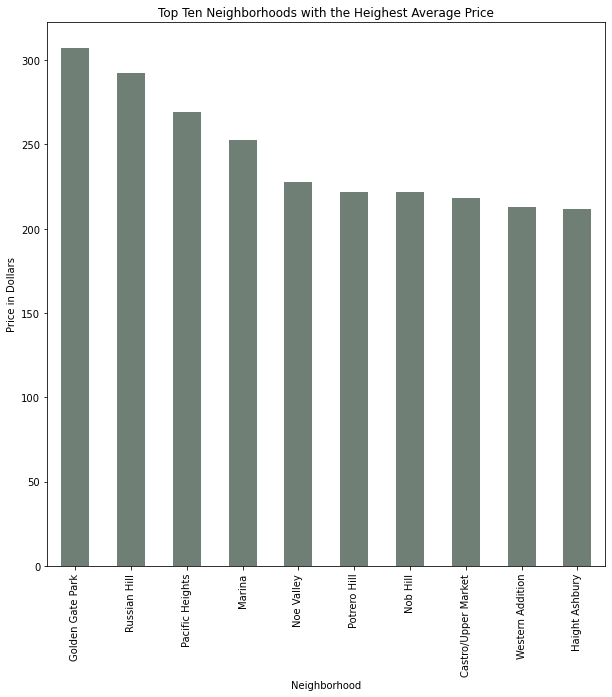

In [10]:
neighborhoodPrice = data.groupby(["neighborhood"]).mean().price.sort_values(ascending = False).head(10)
neighborhoodPrice.plot(x = "neighborhood", y = "price", kind = "bar",  xlabel = "Neighborhood", ylabel = "Price in Dollars", title = "Top Ten Neighborhoods with the Heighest Average Price", color = "#6f7f76",figsize = (10, 10))


This bar graph above shows the ten neighborhoods with the highest average price. The Graph below shows the oposite, the ten neighborhoods with the lowest average price. Lets focus in on the neighborhood with the highest average listing, Golden Gate Park. The graph prior to this one, showed that the Golden Gate Park neighborhood held the second to least number of listing. This is important to note because although there are only a few listings, the average of those few listing is the highest of all neighborhood average. Does neighborhood have a high impact on price?

<AxesSubplot:title={'center':'The Ten Neighborhoods with the lowest Average Price'}, xlabel='Neighborhood', ylabel='Price in Dollars'>

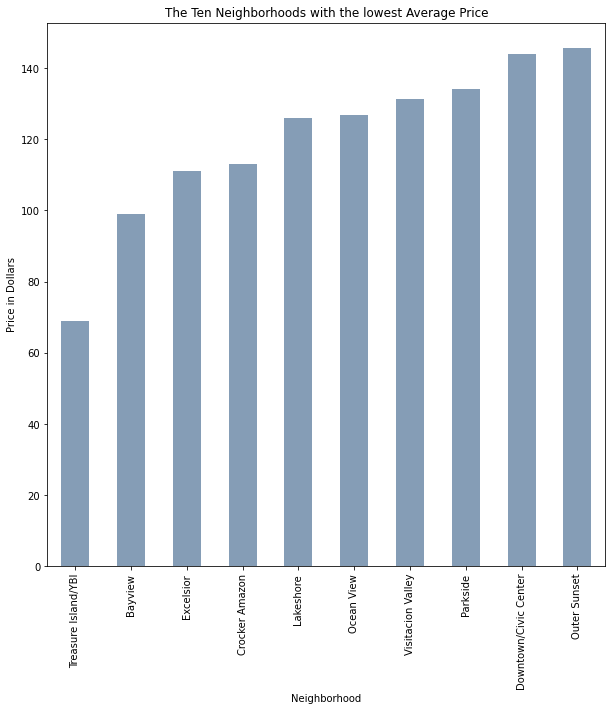

In [11]:
neighborhoodPrice = data.groupby(["neighborhood"]).mean().price.sort_values(ascending = True).head(10)
neighborhoodPrice.plot(x = "neighborhood", y = "price", kind = "bar",  xlabel = "Neighborhood", ylabel = "Price in Dollars", title = "The Ten Neighborhoods with the lowest Average Price", color = "#859db6",figsize = (10, 10))


### Price based on Room Type

<AxesSubplot:title={'center':'Room Type Impact On Price'}, xlabel='room_type', ylabel='price'>

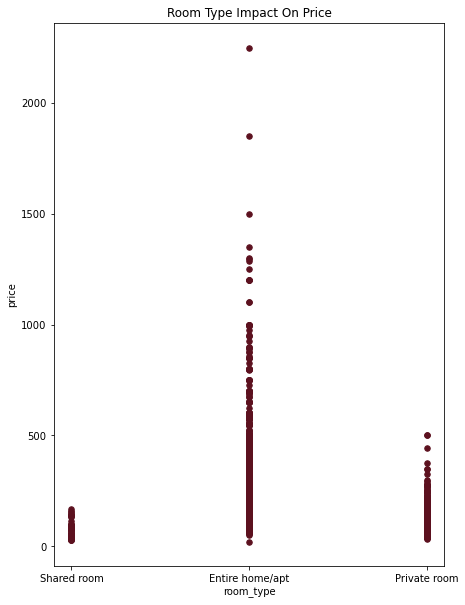

In [12]:
typePrice = data.loc[:, ["room_type","price"]]
typePrice.plot(x = "room_type", y = "price", title = "Room Type Impact On Price", kind = "scatter", figsize = (7,10), color = "#5c111f", s = 30)

The line graph above shows the relationship between room type and price. Entire home/apt hold the listings with the highest rental price with Private room sollowing and shared room with the lowest prices. This makes sense because people tend to pay more for privacy.

### Price based on Satisfaction Rating

0.13624297815541156


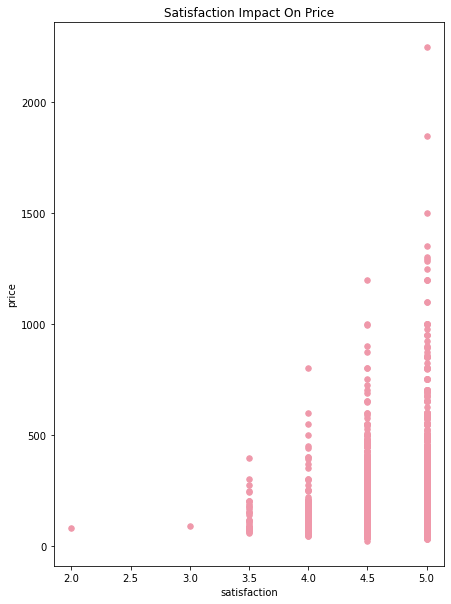

In [13]:
data.plot(x = "satisfaction", y = "price", title = "Satisfaction Impact On Price", kind = "scatter", figsize = (7,10), color = "#ef98aa", s = 30)

print(data.satisfaction.corr(data.price))

This visualization shows the relationship between price and satisfaction. The listings with the higher price tend to have higher satisfaction ratings.

### Price based on Number of Accommodates

0.6597697463453797


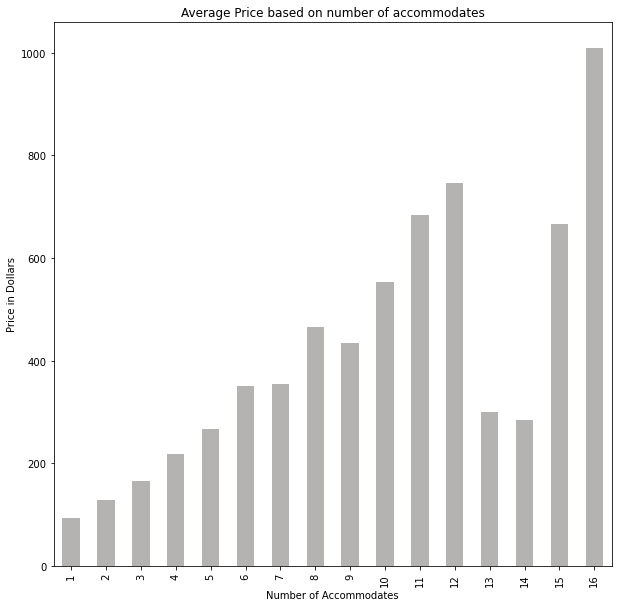

In [14]:
accPrice = data.groupby(["accommodates"]).mean().price
accPrice.plot(x = "accommodates", y = "price", kind = "bar",  xlabel = "Number of Accommodates", ylabel = "Price in Dollars", 
              title = "Average Price based on number of accommodates", color = "#b5b3b1",figsize = (10, 10))

print(data.accommodates.corr(data.price))

In this visualization there seems to be a linear relationship between number of accommodates and price except there a few outliers.

0.6814441048198981


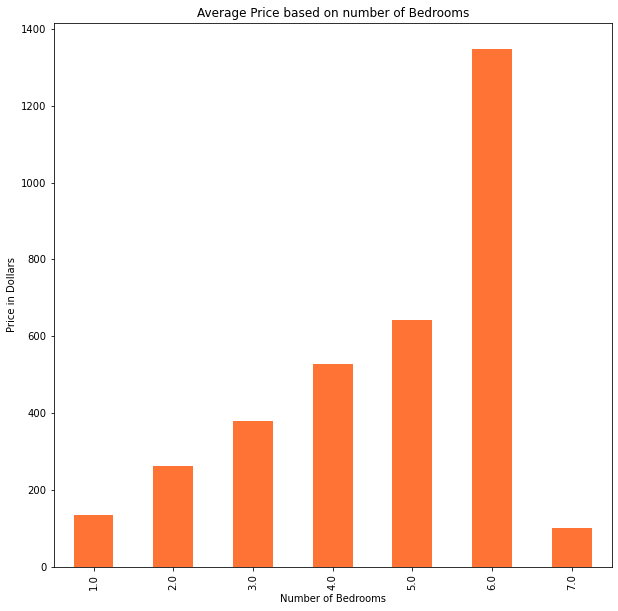

In [15]:
bedPrice = data.groupby(["bedrooms"]).mean().price
bedPrice.plot(x = "bedrooms", y = "price", kind = "bar",  xlabel = "Number of Bedrooms", ylabel = "Price in Dollars", 
              title = "Average Price based on number of Bedrooms", color = "#ff7434",figsize = (10, 10))

print(data.bedrooms.corr(data.price))

### Correlations

In [32]:
print("Bedroom Correlation is:", round(data.bedrooms.corr(data.price),2))
print("Accomodate Correlation is:", round(data.accommodates.corr(data.price),2))
print("Latitude Correlation is:", round(data.latitude.corr(data.price),2))
print("Satisfaction Correlation is: ", round(data.satisfaction.corr(data.price),2))
print("Longitude Correlation is:", round(data.longitude.corr(data.price),2))
print("Reviews Correlation is:", round(data.reviews.corr(data.price),2))


Bedroom Correlation is: 0.68
Accomodate Correlation is: 0.66
Latitude Correlation is: 0.17
Satisfaction Correlation is:  0.14
Longitude Correlation is: 0.04
Reviews Correlation is: -0.18


### Data Cleaning for Machine Learning

In [17]:
data[[ "entire", "private","shared"]] = pd.get_dummies(data["room_type"])
data[['Bayview', 'Bernal Heights', 'Castro/Upper Market', 'Chinatown',
       'Crocker Amazon', 'Diamond Heights', 'Downtown/Civic Center',
       'Excelsior', 'Financial District', 'Glen Park', 'Golden Gate Park',
       'Haight Ashbury', 'Inner Richmond', 'Inner Sunset', 'Lakeshore',
       'Marina', 'Mission', 'Nob Hill', 'Noe Valley', 'North Beach',
       'Ocean View', 'Outer Mission', 'Outer Richmond', 'Outer Sunset',
       'Pacific Heights', 'Parkside', 'Potrero Hill', 'Presidio Heights',
       'Russian Hill', 'Seacliff', 'South of Market', 'Treasure Island/YBI',
       'Twin Peaks', 'Visitacion Valley', 'West of Twin Peaks',
       'Western Addition']]= pd.get_dummies(data["neighborhood"])

## Machine Learning

In this section, I applied machine learning techniques to predict price of an Airbnb based on these columns below. 

1. Room Type
3. Number of Rooms
4. Location
5. Number of Accommodates
6. Neighborhood

I will be using the same data I used for the first section. The cleaned dataset hold 4636 rows & 12 columns.

Type of learning used:

1. Supervised Learning

Metric Used:

1. Root Mean Squared Error (RMSE)

Model Used:

1. Linear Regression
3. Ridge Regression
2. XGBoost Regression

### Linear Regression

In [24]:
X = data[["bedrooms","accommodates", "latitude", "entire", "private","shared", 'Bayview', 'Bernal Heights', 'Castro/Upper Market', 'Chinatown',
       'Crocker Amazon', 'Diamond Heights', 'Downtown/Civic Center','Excelsior', 'Financial District', 'Glen Park', 'Golden Gate Park',
       'Haight Ashbury', 'Inner Richmond', 'Inner Sunset', 'Lakeshore','Marina', 'Mission', 'Nob Hill', 'Noe Valley', 'North Beach',
       'Ocean View', 'Outer Mission', 'Outer Richmond', 'Outer Sunset','Pacific Heights', 'Parkside', 'Potrero Hill', 'Presidio Heights',
       'Russian Hill', 'Seacliff', 'South of Market', 'Treasure Island/YBI','Twin Peaks', 'Visitacion Valley', 'West of Twin Peaks',
       'Western Addition']]

y = data["price"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
linreg = LinearRegression()     
reg = linreg.fit(X_train, y_train)
reg.score(X_test,y_test)

0.615507585687969

In [26]:
training_preds = reg.predict(X_train)
val_preds = reg.predict(X_test)

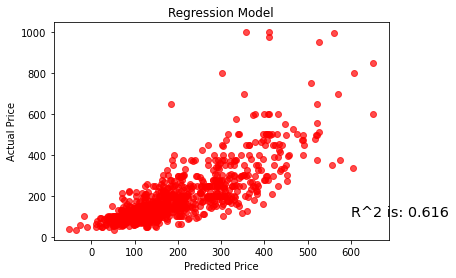

In [27]:
actual_values = y_test
plt.scatter(val_preds, actual_values, alpha=.7,
            color='r') #alpha helps to show overlapping data
overlay = 'R^2 is: {}'.format(
                    (round(r2_score(y_test, val_preds),3)))
plt.annotate(text =overlay,xy=(600,100),size='x-large')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Regression Model')
plt.show()

### Ridge Regression

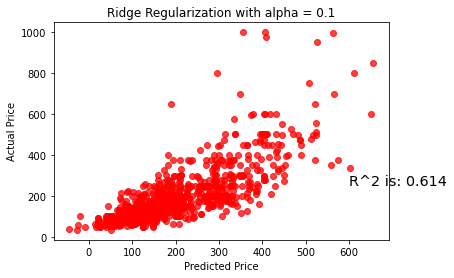

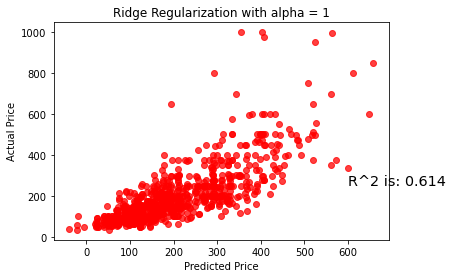

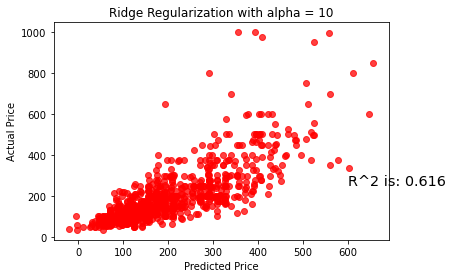

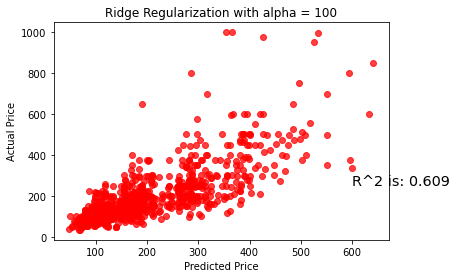

In [28]:
lr = linear_model.LinearRegression()
actual_values = y_test

for i in range (-1, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}'.format(
                   round(ridge_model.score(X_test, y_test), 3))
    plt.annotate( text = overlay,xy=(600, 250),size='x-large')
    plt.show()

### XGBoost Regression

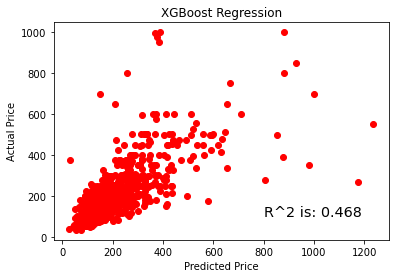

In [29]:
xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X_train, y_train)
training_preds_xgb_reg2 = xgb_reg2.predict(X_train)
val_preds_xgb_reg2 = xgb_reg2.predict(X_test)

plt.scatter(val_preds_xgb_reg2, actual_values,
            color='r') #alpha helps to show overlapping data
overlay = 'R^2 is: {}'.format(
                    (round(r2_score(y_test, val_preds_xgb_reg2),3)))
plt.annotate(text =overlay,xy=(800,100),size='x-large')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Regression')
plt.show()

### Conclusion

From the three regression models, the Linear Regression model had the highest prediction percentage, 61.6%. Unfortunatlly, This percentage is not at the level it should have been.This could have resulted from a number of reasons. There could have been other features that have a bigger impact on price that was not included in this dataset. One potential feature that can affect price and is not included in the dataset is neighborhood safety ranking. 